## Planetary images WCS manipulations

This tutorial exemplifies some planetary FITS WCS manipulations available in astropy starting from version 6.
It is based on the [astropy image utilities tutorial](https://docs.astropy.org/en/stable/nddata/utils.html#).

### Show image properties and display

In [1]:
from astropy.io import fits
from astropy.wcs import WCS

# Load the image and the WCS
filename = "data/mercury_cutout.fits"
hdu = fits.open(filename)[0]
wcs = WCS(hdu.header)

In [2]:
# Print out all of the settings that were parsed from the header
wcs.wcs.print_contents()

       flag: 137
      naxis: 2
      crpix: 0x559edeeefc60
               3320.5       1148.5    
         pc: 0x559edeeefc80
    pc[0][]:   1.0000       0.0000    
    pc[1][]:  -0.0000      -1.0000    
      cdelt: 0x559eded6a850
               0.046975    -0.046975  
      crval: 0x559eded6a870
               0.0000       0.0000    
      cunit: 0x559edeced280
             "deg"
             "deg"
      ctype: 0x559edeca7cf0
             "MELN-CAR"
             "MELT-CAR"
    lonpole:  0.000000
    latpole: 90.000000
    restfrq: 0.000000
    restwav: 0.000000
        npv: 0
     npvmax: 0
         pv: 0x0
        nps: 0
     npsmax: 0
         ps: 0x0
         cd: 0x559eded7c670
    cd[0][]:   0.0000       0.0000    
    cd[1][]:   0.0000       0.0000    
      crota: 0x559eded6a890
               0.0000       0.0000    
     altlin: 1
     velref: 0
        alt: ' '
     colnum: 0
      colax: 0x559eded7c6a0
                 0      0
      cname: 0x559edecc44c0
             UNDEF

Now, we can display the image:

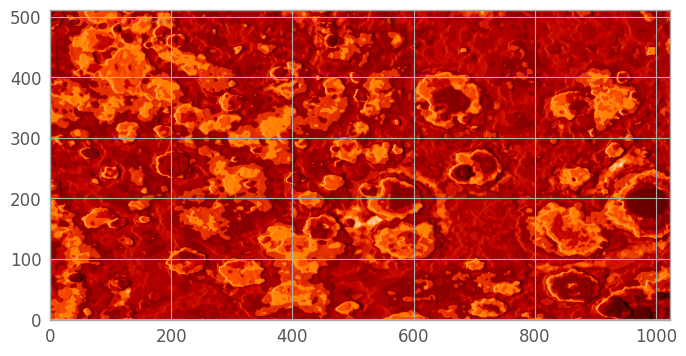

In [5]:
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style

plt.style.use(astropy_mpl_style)
plt.imshow(hdu.data, origin='lower')

### Image cutouts

We are interested in the feature centered around (700,250).
We create a cutout centered at position (x, y) = (700,250) with a size of (ny, nx) = (100, 200) pixels:

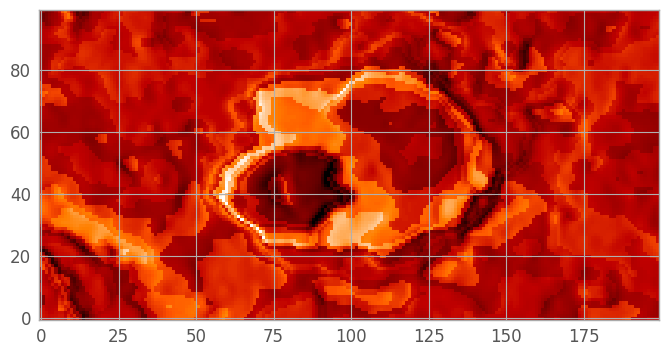

In [6]:
from astropy.nddata import Cutout2D
from astropy import units as u

position = (700,250)
size = (100, 200)     # pixels
cutout = Cutout2D(hdu.data, position, size)
plt.imshow(cutout.data, origin='lower')

The input size can also be specified as a Quantity in angular units (e.g., degrees, arcminutes, arcseconds, etc.). For this case, a WCS object must be input via the wcs keyword.

For this example, we will use the data, and wcs object from the original image to create a cutout with size 3.5 x 5.5 degrees:

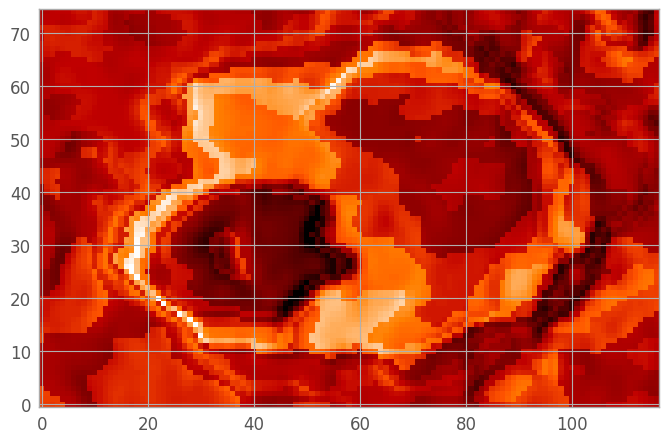

In [7]:
size = u.Quantity((3.5, 5.5), u.deg)
cutout = Cutout2D(hdu.data, position, size, wcs=wcs)

plt.imshow(cutout.data, origin='lower')   

We want to know the position of the center of the cutout:

In [8]:
import numpy as np
# Convert pixel coordinates to world coordinates
# The second argument is "origin" -- in this case we're declaring we
# have 0-based (Numpy-like) coordinates.
world = wcs.wcs_pix2world(np.array([position]), 0)
print(world)

[[236.94818854 -42.16033624]]


### Saving a 2D Cutout to a FITS File with an Updated WCS

In [9]:
# Put the cutout image in the FITS HDU
hdu.data = cutout.data

# Update the FITS header with the cutout WCS
hdu.header.update(cutout.wcs.to_header())

# Write the cutout to a new FITS file
cutout_filename = 'cutout.fits'
hdu.writeto(cutout_filename, overwrite=True)